# Prak. Pengenalan Pola - P7
# Decision Tree

## 1. Percobaan
a. Decision tree

b. CART

c. Bagging

In [1]:
import time
import os

#Import Library
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import matplotlib.pyplot as plt

#Library CART pada python
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
import random as rnd
from sklearn.metrics import r2_score

# baggings
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
#!pip install pydot

src:
https://www.albgri.com/python-tree-rf/


In [3]:
# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot
#!apk add --update --no-cache graphviz
#!sudo apt install python3-pydot python3-pydot-ng graphviz

In [4]:
# utility cell
class obj(object): pass
go = obj()

def plotgraph(dtree, features):
    # plot tree
    """
    dtree = DecisionTreeClassifier object
    features = features in list of string
    """
    dot_data = StringIO()
    export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

    graph = pydot.graph_from_dot_data(dot_data.getvalue())
#     graph[0].write_png("test.png")
    name = 'tree' + str(time.time())
#     graph.write_png(name+  '.png')
#     os.system('dot -Tpng tree.dot -o tree.png')
    
    return Image(graph[0].create_png())

# pregnant  insulin   bmi  age  glucose   bp  pedigree
# plotgraph(clf, [
#     "pregnant","insulin","bmi","age","glucose", "bp", "pedigree"
# ])

In [17]:
#Melakukan pembacaaan dataset 
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)
#print(pima) 

#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
x = pima[feature_cols] # Features
y = pima.label # Target variable

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=3)

In [6]:
pima.head(), print("x"), x, print("y"), y

x
y


(   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
 0         6      148  72    35        0  33.6     0.627   50      1
 1         1       85  66    29        0  26.6     0.351   31      0
 2         8      183  64     0        0  23.3     0.672   32      1
 3         1       89  66    23       94  28.1     0.167   21      0
 4         0      137  40    35      168  43.1     2.288   33      1,
 None,
      pregnant  insulin   bmi  age  glucose  bp  pedigree
 0           6        0  33.6   50      148  72     0.627
 1           1        0  26.6   31       85  66     0.351
 2           8        0  23.3   32      183  64     0.672
 3           1       94  28.1   21       89  66     0.167
 4           0      168  43.1   33      137  40     2.288
 ..        ...      ...   ...  ...      ...  ..       ...
 763        10      180  32.9   63      101  76     0.171
 764         2        0  36.8   27      122  70     0.340
 765         5      112  26.2   30      121  72     0.24

In [7]:
X_train, X_test, y_train, y_test

(     pregnant  insulin   bmi  age  glucose   bp  pedigree
 537         0        0  21.7   67       57   60     0.735
 506         0       90  36.5   35      180   90     0.314
 106         1        0  22.4   27       96  122     0.207
 216         5      129  35.8   25      109   62     0.514
 95          6      228  33.9   40      144   72     0.255
 ..        ...      ...   ...  ...      ...  ...       ...
 659         3       70  34.2   27       80   82     1.292
 256         3        0  30.1   30      111   56     0.557
 643         4        0  28.0   31       90    0     0.610
 249         1        0  30.1   23      111   86     0.143
 664         6        0  33.7   40      115   60     0.245
 
 [576 rows x 7 columns],
      pregnant  insulin   bmi  age  glucose  bp  pedigree
 51          1       36  24.2   26      101  50     0.526
 378         4        0  48.3   32      156  75     0.238
 27          1      140  23.2   22       97  66     0.487
 579         2        0  34.7   6

### a. Decision tree

In [8]:
# Membuat objek DT
# Dapat dioptimalkan dengan menghitung Entropy
clf = DecisionTreeClassifier()
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Melakukan Pelatihan DT
clf = clf.fit(X_train,y_train)

# Memprediksi
y_pred = clf.predict(X_test)

# Menghitung akurasi model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.671875


### b. CART

In [18]:
boston_dataset = load_boston()

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

boston['MEDV'] = boston_dataset.target
names = boston_dataset.feature_names

array = boston.values

X = array[:,0:13]
Y = array[:,13]

In [19]:
names, array, X, Y

(array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7'),
 array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
         2.4000e+01],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
         2.1600e+01],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
         3.4700e+01],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
         2.3900e+01],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
         2.2000e+01],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
         1.1900e+01]]),
 array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300

In [10]:

#print(X)
#print(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

#model = DecisionTreeRegressor(max_leaf_nodes = 20)

model = DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=50, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           random_state=None, splitter='best')

#Evaluasi 
rt = model.fit(X_train, Y_train)
rt

rnd.seed(123458)
X_new = X[rnd.randrange(X.shape[0])]
X_new = X_new.reshape(1,13)

#Prediksi Model 
YHat = model.predict(X_new)


df = pd.DataFrame(X_new, columns = names)
df["Predicted Price"] = YHat
df.head(1)

YHat = model.predict(X_test)
print(YHat)

#Menghitung Rata-rata Kuadrat
r2 = r2_score(Y_test, YHat)
print("R-Squared = ", r2)

[35.51       24.26666667 10.38571429 22.35238095 14.02142857 23.71666667
 19.83421053 15.43571429 20.575      27.45       15.43571429 22.35238095
 22.35238095 18.31666667 17.71111111 23.71666667  8.49285714 16.81428571
 19.83421053 10.38571429 37.73333333 23.71666667 19.83421053 16.81428571
 27.45       19.77142857 19.83421053 22.46428571 31.52857143 22.83333333
 20.575      19.33333333 18.31666667 14.02142857 23.71666667 17.13333333
 20.50714286 22.35238095 10.38571429  8.49285714  8.49285714 18.31666667
 49.78571429 31.76       19.83421053 25.4375     25.4375     42.3
 14.02142857 25.4375     19.83421053 35.51       23.71666667 23.71666667
 50.         31.76       10.38571429 31.52857143 25.4375     22.35238095
 35.51       15.43571429 29.33333333 37.73333333 10.38571429 22.46428571
 35.51       20.50714286 47.36666667 47.36666667 10.95       23.71666667
 14.02142857 19.18333333 23.71666667 10.38571429 41.7        23.71666667
 15.08181818 15.08181818 47.36666667 49.78571429 23.716666

### c. Bagging

In [11]:
# Bagging
#Load cancer dataset
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target

#membagi dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)


#Melakukan pipelining
pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=1))
bc

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [12]:
#Skema bagging
bgclassifier = BaggingClassifier(base_estimator=pipeline, n_estimators=100,
                                 max_features=8,
                                 max_samples=80,
                                 random_state=1, n_jobs=5)

bgclassifier.fit(X_train, y_train)

print('Model test Score: %.3f, ' %bgclassifier.score(X_test, y_test),
      'Model training Score: %.3f' %bgclassifier.score(X_train, y_train))

Model test Score: 0.958,  Model training Score: 0.960


## 2. Latihan
### 1. Melakukan visualisasi Tree
a. Decision Tree

b. CART 
### 2.Melakukan tanpa skema bagging 
Pada Bagging

In [14]:
# pairplot
# sns.pairplot(pd.DataFrame(data={
#     "d1": y_test, 
#     "d2": y_pred
# }),hue='Kyphosis',palette='Set1')

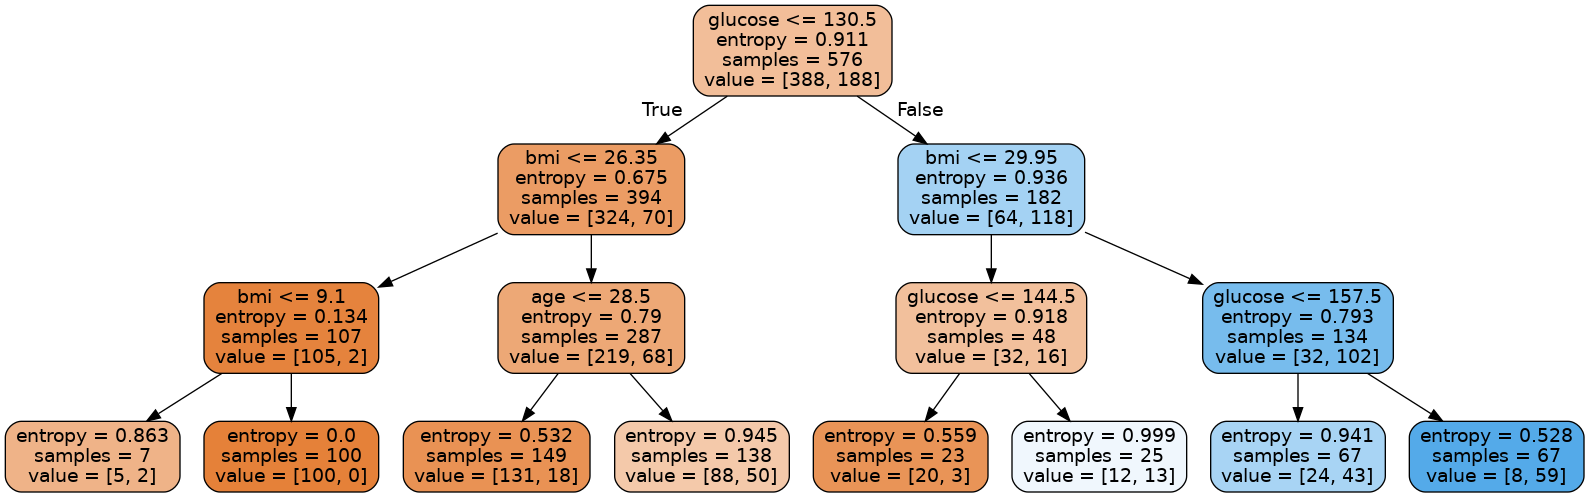

In [21]:
# Decision tree
# pregnant  insulin   bmi  age  glucose   bp  pedigree
plotgraph(clf, [
    "pregnant","insulin","bmi","age","glucose", "bp", "pedigree"
])

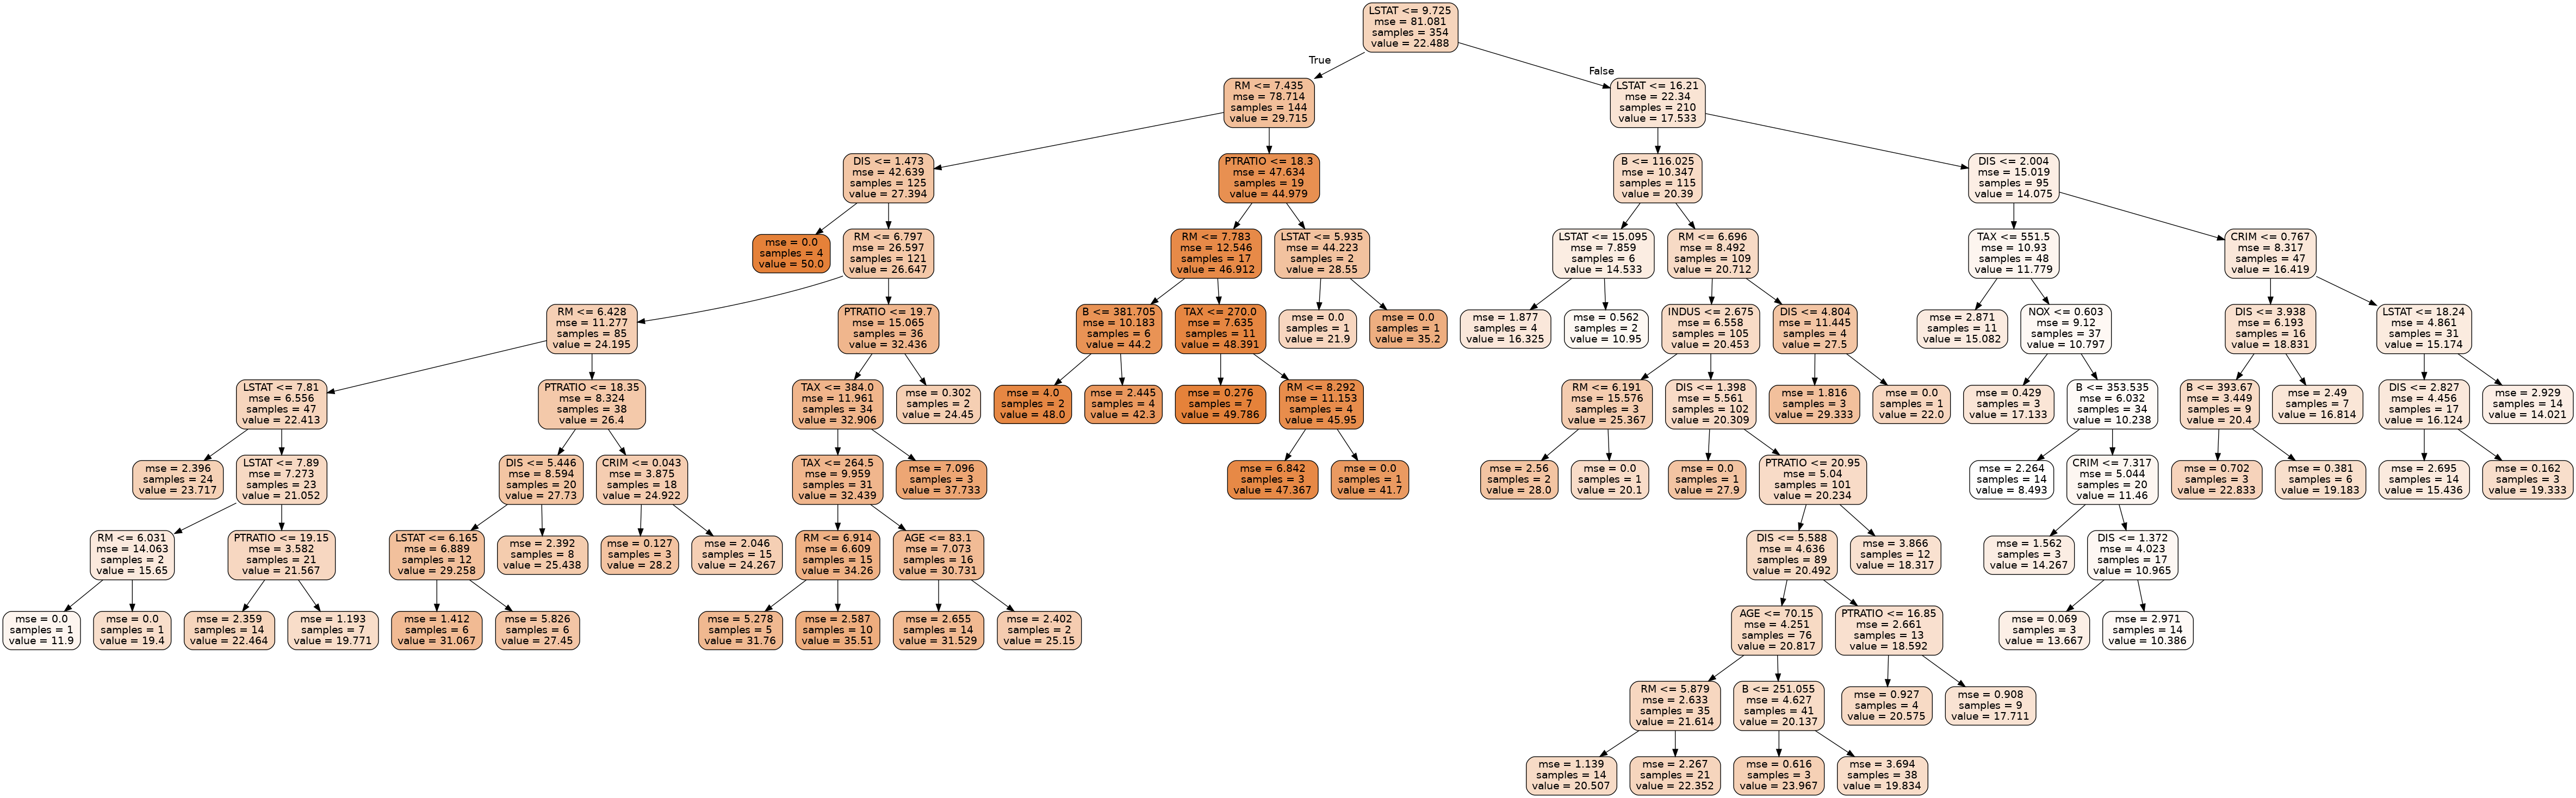

In [22]:
# CART
plotgraph(model, ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'])